In [1]:
!nvidia-smi

import os
HOME = os.getcwd()
print(HOME)

!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ONRrGJFVC9GgYdOf6Nr1")
project = rf.workspace("chicken-detection-e7acb").project("chicken-detection-gkoje")
version = project.version(3)
dataset = version.download("yolov8")

%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

!ls {HOME}/runs/detect/train/


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chicken-Detection-3 in yolov8:: 100%|██████████| 1598/1598 [00:00<00:00, 7585.24it/s]


/content
100% 21.5M/21.5M [00:00<00:00, 235MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chicken-Detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

/content


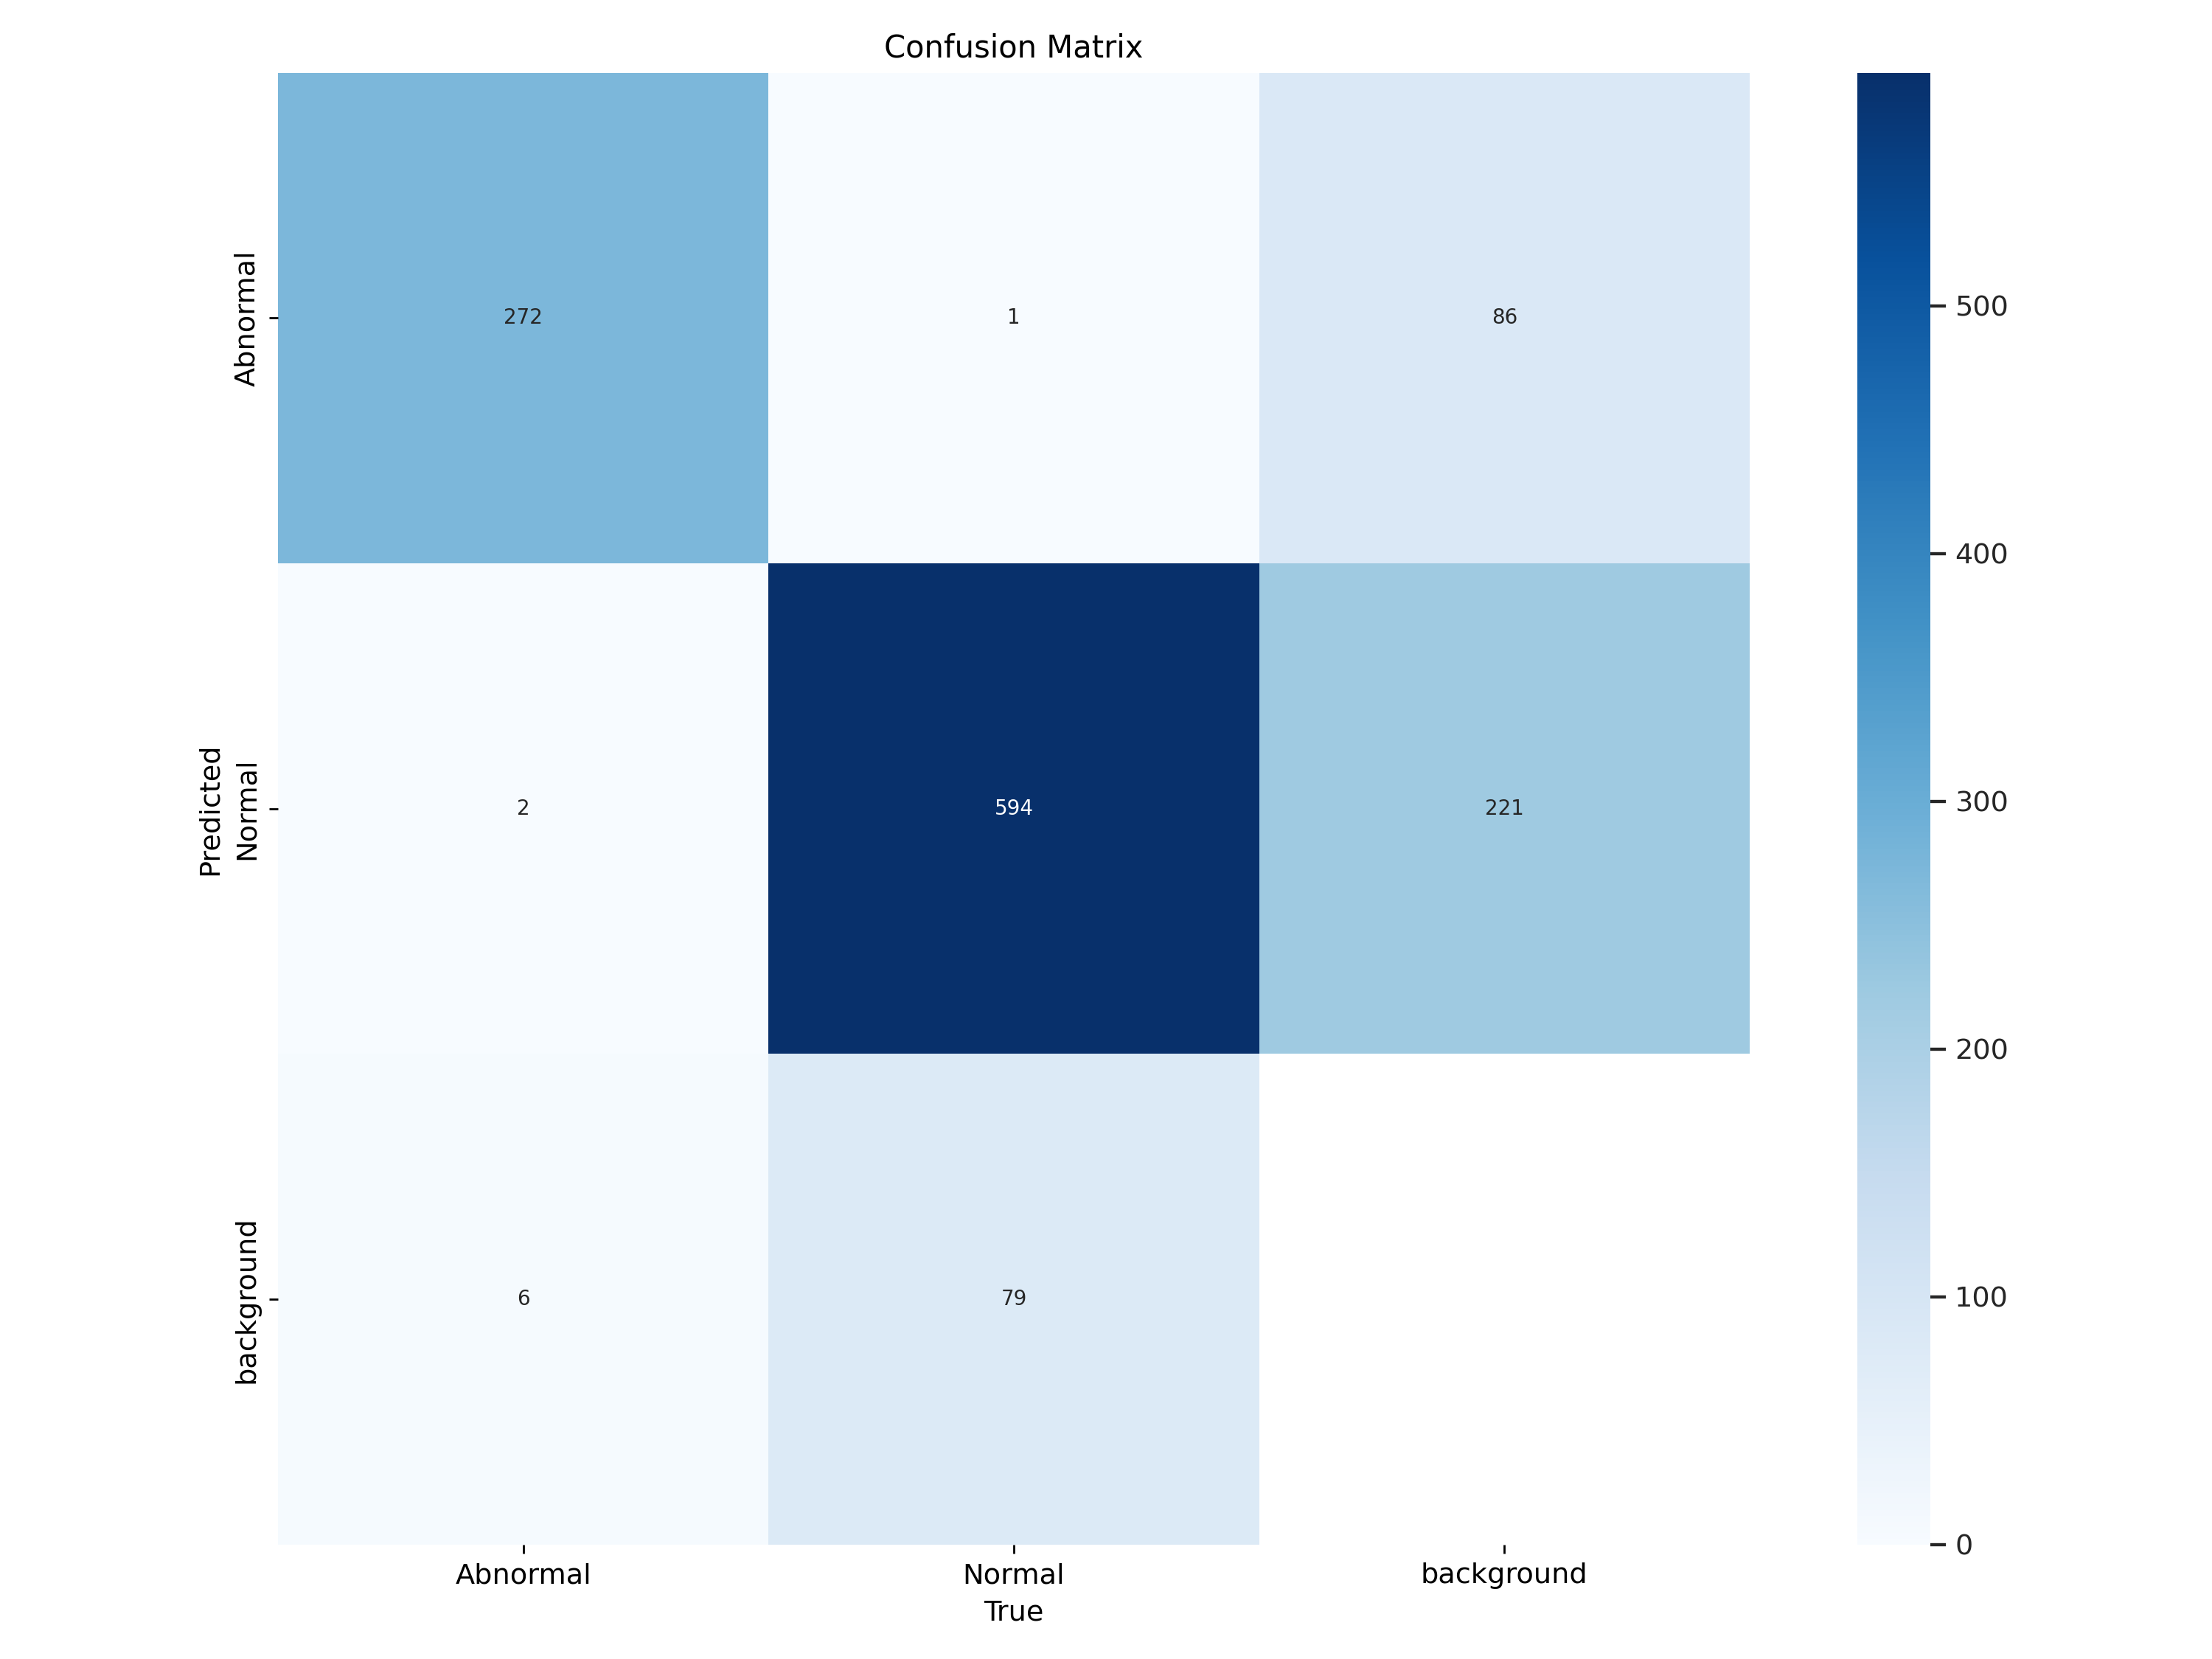

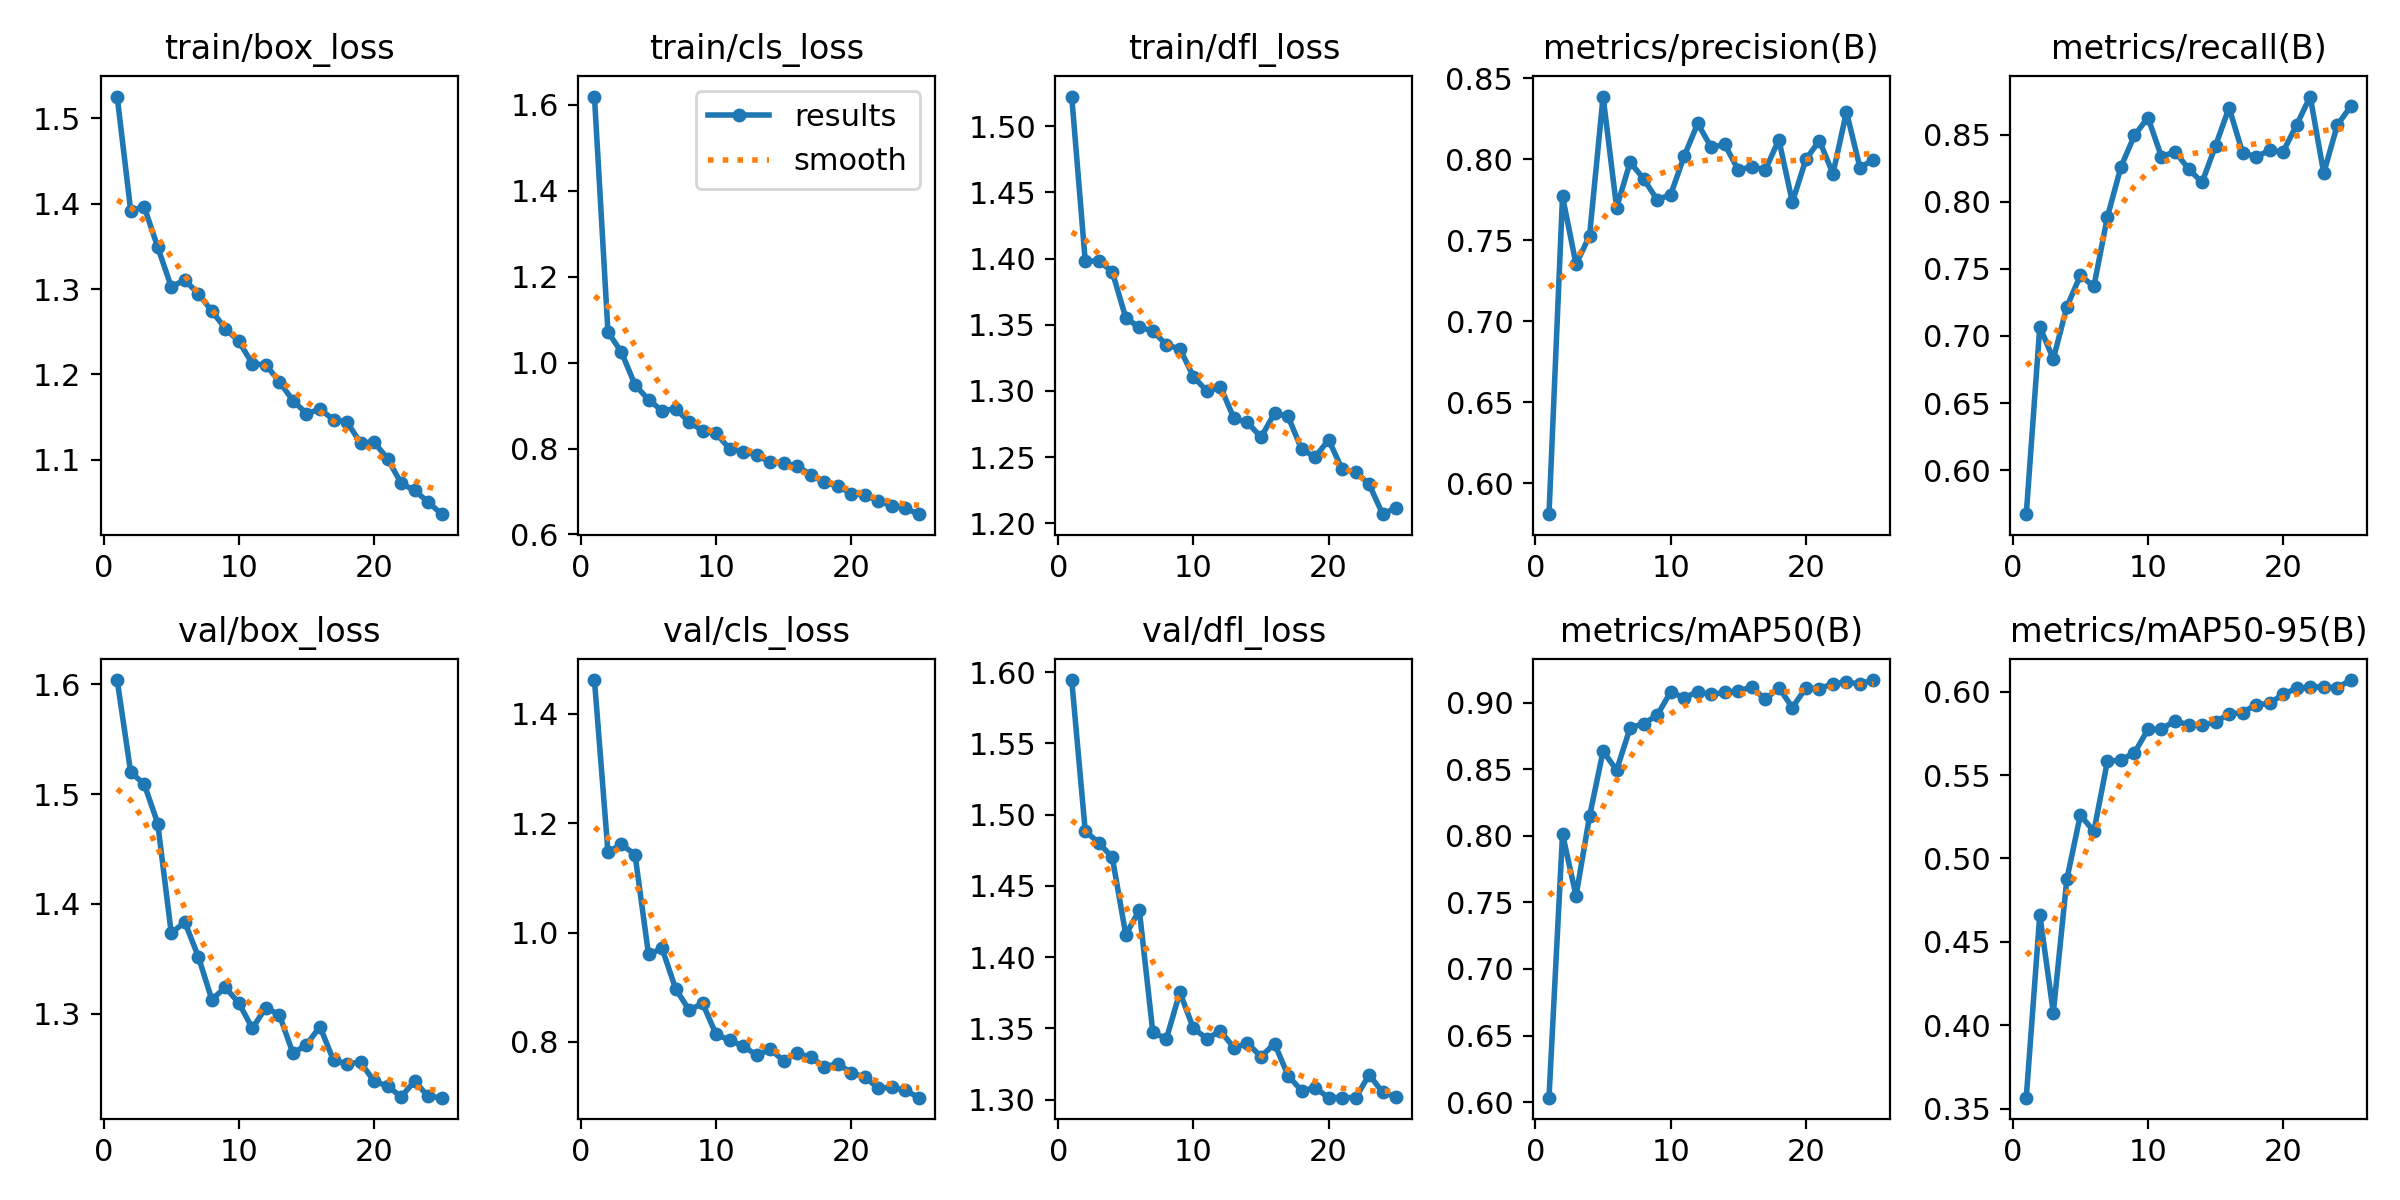

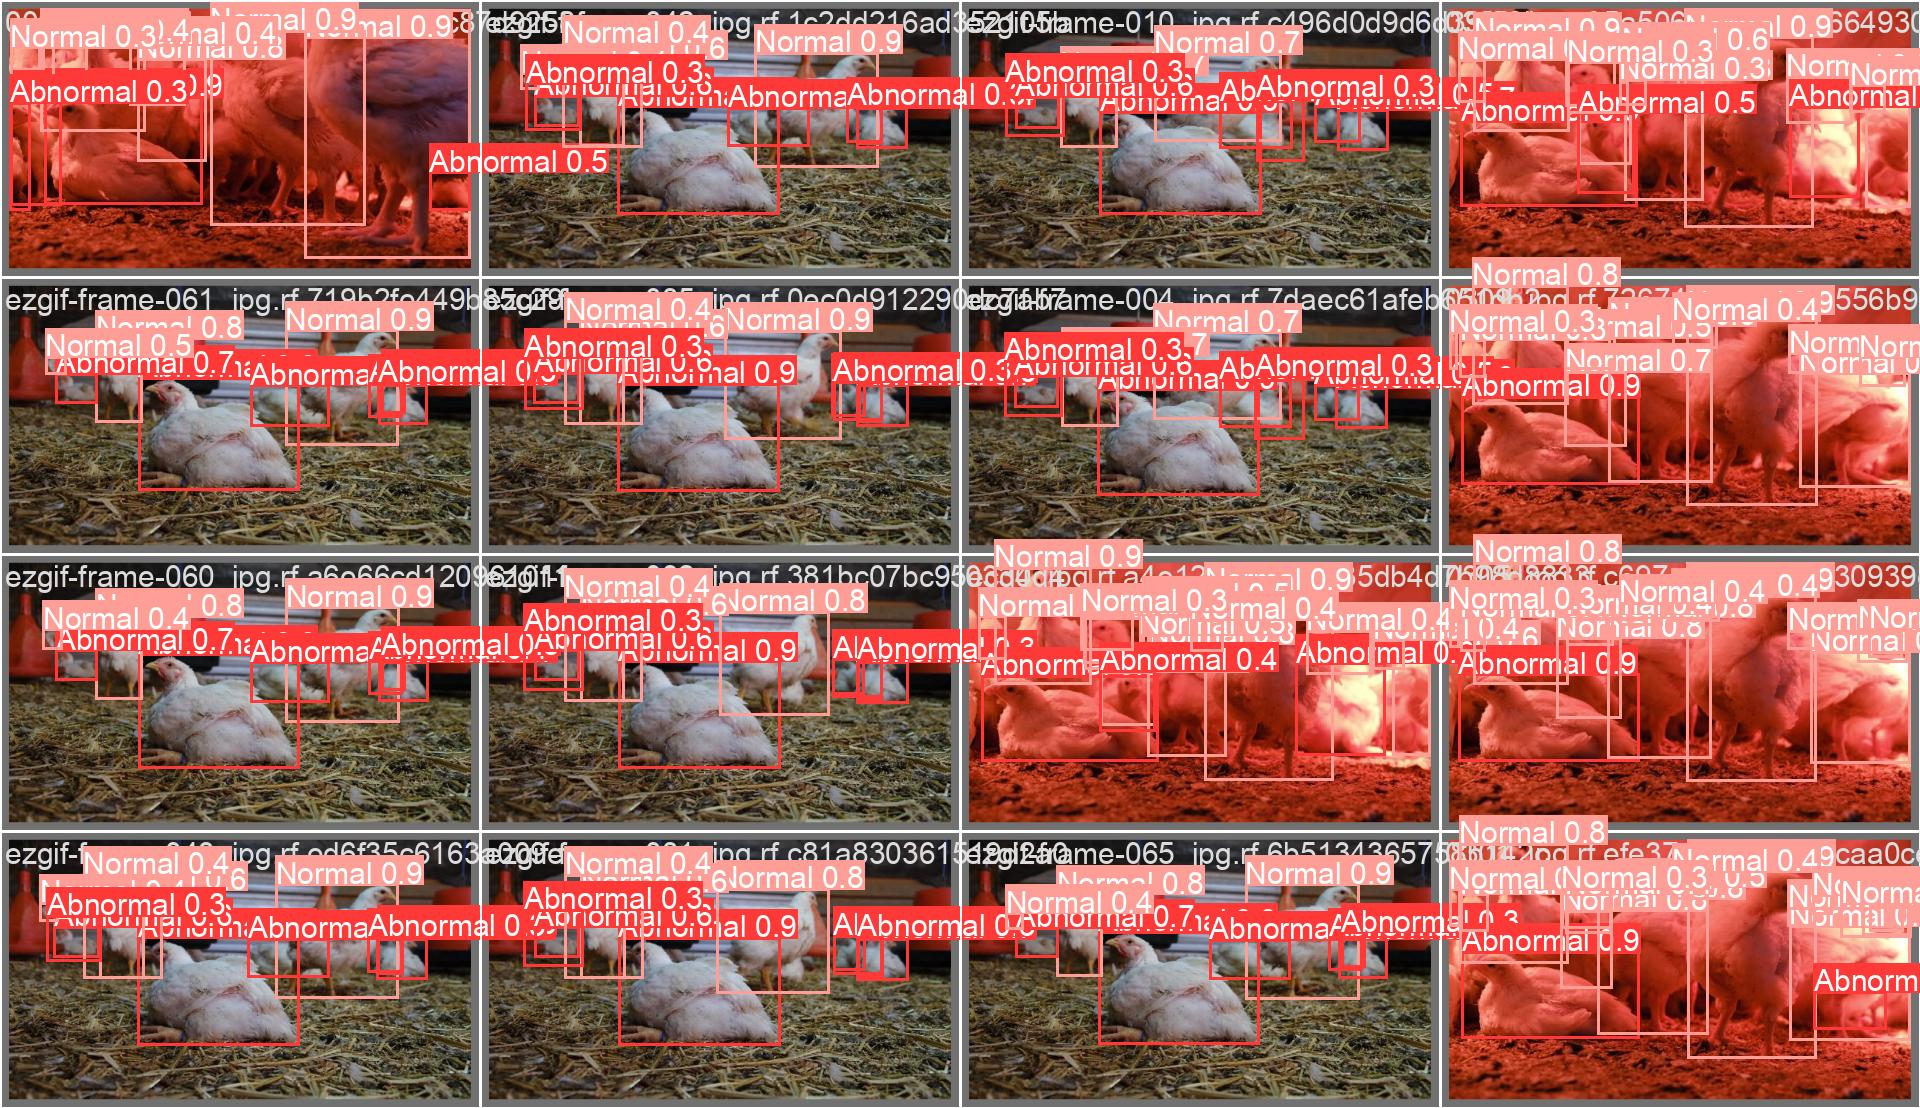

In [2]:
%cd {HOME}
display(Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600))

display(Image(filename=f'{HOME}/runs/detect/train/results.png', width=600))

display(Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600))



In [3]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml



/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Chicken-Detection-3/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:09<00:00,  1.38s/it]
                   all        104        954        0.8      0.872      0.917      0.608
              Abnormal        104        280      0.831      0.934      0.947      0.636
                Normal        104        674      0.768       0.81      0.887       0.58
Speed: 5.8ms preprocess, 16.1ms inference, 0.0ms loss, 11.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/53 /content/datasets/Chicken-Detection-3/test/images/0006_jpg.rf.c5d3954c4c1a3f7195acfba9cbce4549.jpg: 480x800 4 Abnormals, 10 Normals, 125.0ms
image 2/53 /content/datasets/Chicken-Detection-3/test/images/0012_jpg.rf.1f396e8b6d4630eda3ca263fa0fc2a2d.jpg: 480x800 5 Abnormals, 11 Normals, 15.6ms
image 3/53 /content/datasets/Chicken-Detection-3/test/images/0023_jpg.rf.012c4282946af70d9bd10be5589b3d7d.jpg: 480x800 4 Abnormals, 13 Normals, 15.5ms
image 4/53 /content/datasets/Chicken-Detection-3/test/images/0024_jpg.rf.8d6474d7a1eff0f10b686749c403dec0.jpg: 480x800 5 Abnormals, 12 Normals, 15.5ms
image 5/53 /content/datasets/Chicken-Detection-3/test/images/0027_jpg.rf.3c902bebfd455c12e83728281860c238.jpg: 480x800 4 Abnormals, 13 Normals, 15.5ms
image 6/53 /content/dat

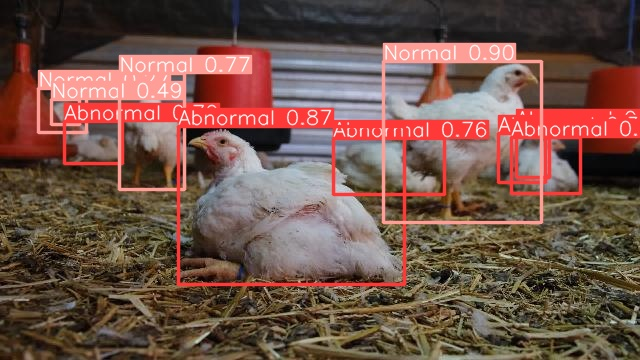

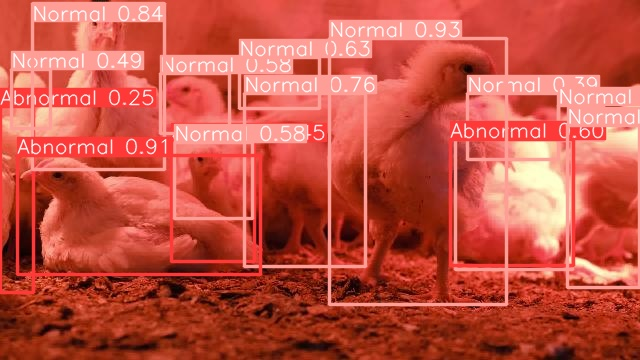

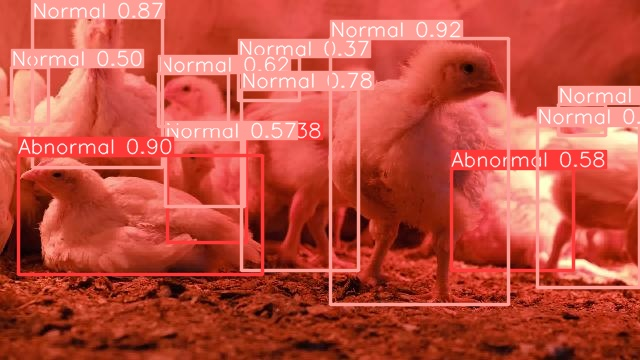

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
print("\n")


In [5]:
!pip install tensorflow opencv-python


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# Load the trained disease classification model
model = tf.keras.models.load_model('chicken_disease_classifier.h5')

# Function to preprocess image for disease model
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img


In [9]:
from ultralytics import YOLO

# Initialize YOLO model
yolo_model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output_video.avi', fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        results = yolo_model(frame)

        # Loop through detected objects
        for result in results:
            for bbox in result.boxes:
                x1, y1, x2, y2 = map(int, bbox.xyxy[0].tolist())
                crop_img = frame[y1:y2, x1:x2]
                preprocessed_frame = preprocess_image(crop_img)

                # Make disease prediction
                prediction = model.predict(preprocessed_frame)
                predicted_class = "Newcastle disease" if prediction > 0.5 else "Leg Diseases"

                # Annotate the frame with the prediction
                label = f'{predicted_class}'
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        out.write(frame)
        cv2_imshow(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()



In [ ]:
# Upload the video file
uploaded = files.upload()

# Process and predict on the uploaded video
for video_name in uploaded.keys():
    process_video(video_name)

# Download the output video
files.download('output_video.avi')

